In [3]:
# Read Image
import numpy as np
import skimage
Xi = skimage.io.imread("To_Matrix_test.png")  #把圖片轉為三維tensor, 所以input為圖檔
Xi #98=R, 40=G, 69=B, 此(3,) array = [98, 40, 69] 為一個pixel值

Array([[[ 98,  40,  69],
        [ 98,  40,  69],
        [ 98,  40,  69],
        ...,
        [ 95,  41,  88],
        [ 95,  41,  88],
        [  0,   0,   0]],

       [[ 98,  40,  69],
        [ 98,  40,  69],
        [ 98,  40,  69],
        ...,
        [ 95,  41,  88],
        [ 95,  41,  88],
        [  0,   0,   0]],

       [[ 98,  40,  69],
        [ 98,  40,  69],
        [ 98,  40,  69],
        ...,
        [ 95,  41,  88],
        [ 95,  41,  88],
        [  0,   0,   0]],

       ...,

       [[103,  49,  77],
        [103,  49,  77],
        [103,  49,  77],
        ...,
        [101,  53, 100],
        [101,  53, 100],
        [  0,   0,   0]],

       [[103,  49,  77],
        [103,  49,  77],
        [103,  49,  77],
        ...,
        [101,  53, 100],
        [101,  53, 100],
        [  0,   0,   0]],

       [[103,  49,  77],
        [103,  49,  77],
        [103,  49,  77],
        ...,
        [101,  53, 100],
        [101,  53, 100],
        [  0,   0,   0]]

In [4]:
Xi.shape #shape = (width, height, channels)

(518, 1017, 3)

In [5]:
Xi = skimage.transform.resize(Xi, (299,299)) 
Xi

array([[[0.37960522, 0.14901961, 0.26587973],
        [0.37647059, 0.14901961, 0.2627451 ],
        [0.37647059, 0.14509804, 0.2627451 ],
        ...,
        [0.36862745, 0.15686275, 0.34117647],
        [0.36470588, 0.15294118, 0.3372549 ],
        [0.29023543, 0.12236868, 0.26905371]],

       [[0.37960522, 0.14901961, 0.26587973],
        [0.37647059, 0.14901961, 0.2627451 ],
        [0.37647059, 0.14509804, 0.2627451 ],
        ...,
        [0.36862745, 0.15686275, 0.34117647],
        [0.36470588, 0.15294118, 0.3372549 ],
        [0.29023543, 0.12236868, 0.26905371]],

       [[0.37960522, 0.14901961, 0.26587973],
        [0.37647059, 0.14901961, 0.2627451 ],
        [0.37647059, 0.14509804, 0.2627451 ],
        ...,
        [0.36862745, 0.15686275, 0.34117647],
        [0.36470588, 0.15294118, 0.3372549 ],
        [0.29023543, 0.12236868, 0.26905371]],

       ...,

       [[0.4       , 0.18823529, 0.29803922],
        [0.4       , 0.18823529, 0.29803922],
        [0.4       , 0

In [6]:
Xi.shape

(299, 299, 3)

In [8]:
#Xi is already divided by 255 after resizing
Xi = (Xi - 0.5)*2 #This is so-called Inception pre-processing => 餵進這pre-trained model必須轉成這種值
Xi

array([[[-1.48157912, -2.40392157, -1.93648108],
        [-1.49411765, -2.40392157, -1.94901961],
        [-1.49411765, -2.41960784, -1.94901961],
        ...,
        [-1.5254902 , -2.37254902, -1.63529412],
        [-1.54117647, -2.38823529, -1.65098039],
        [-1.8390583 , -2.51052528, -1.92378517]],

       [[-1.48157912, -2.40392157, -1.93648108],
        [-1.49411765, -2.40392157, -1.94901961],
        [-1.49411765, -2.41960784, -1.94901961],
        ...,
        [-1.5254902 , -2.37254902, -1.63529412],
        [-1.54117647, -2.38823529, -1.65098039],
        [-1.8390583 , -2.51052528, -1.92378517]],

       [[-1.48157912, -2.40392157, -1.93648108],
        [-1.49411765, -2.40392157, -1.94901961],
        [-1.49411765, -2.41960784, -1.94901961],
        ...,
        [-1.5254902 , -2.37254902, -1.63529412],
        [-1.54117647, -2.38823529, -1.65098039],
        [-1.8390583 , -2.51052528, -1.92378517]],

       ...,

       [[-1.4       , -2.24705882, -1.80784314],
        [-1

In [9]:
Xi.shape

(299, 299, 3)

In [10]:
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing #將tensor(可以是0-1 or 0-255)轉為圖片

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [12]:
#Predict class for image using InceptionV3
import keras
from keras.applications.imagenet_utils import decode_predictions

np.random.seed(222)
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

In [14]:
#The Inception V3 model is used to predict the class of the image. 
#The output of the classification is a vector of 1000 proabilities of beloging to each class available in Inception V3. 
#The description of these classes is shown and it can be seen that the "Labrador Retriever" is the top class for the given image.

preds = inceptionV3_model.predict(Xi[np.newaxis,:,:,:]) #為何把它變成四維?
preds

array([[2.70561839e-04, 3.68332519e-04, 2.54365528e-04, 6.51799128e-05,
        2.75235914e-04, 1.36365881e-03, 1.31886525e-04, 2.75002531e-04,
        1.98178546e-04, 1.37226423e-04, 4.49395360e-04, 1.85390454e-04,
        9.18879086e-05, 1.70729283e-04, 1.21629855e-04, 2.32168546e-04,
        2.04476324e-04, 1.99094546e-04, 2.69174750e-04, 5.12098413e-05,
        1.01678525e-04, 2.00633876e-04, 9.21233586e-05, 5.93870682e-05,
        1.37272567e-04, 2.09281221e-04, 5.42524213e-04, 1.87219761e-04,
        3.80519516e-04, 2.74073333e-04, 1.01957841e-04, 2.03565825e-04,
        9.25003696e-05, 1.77818423e-04, 1.81535870e-04, 9.71273112e-05,
        1.76713656e-04, 1.06799605e-04, 8.42625566e-04, 1.83020413e-04,
        1.50859691e-04, 2.23504074e-04, 1.21451136e-04, 9.41800186e-04,
        1.60211726e-04, 8.62421221e-05, 1.69507388e-04, 2.82387831e-04,
        1.91511281e-04, 4.69771076e-05, 2.45611212e-04, 4.91281215e-04,
        1.83783515e-04, 2.07126475e-04, 1.66303900e-04, 1.042110

In [26]:
Xi_4 = Xi[np.newaxis,:,:,:]
Xi_4

array([[[[-1.48157912, -2.40392157, -1.93648108],
         [-1.49411765, -2.40392157, -1.94901961],
         [-1.49411765, -2.41960784, -1.94901961],
         ...,
         [-1.5254902 , -2.37254902, -1.63529412],
         [-1.54117647, -2.38823529, -1.65098039],
         [-1.8390583 , -2.51052528, -1.92378517]],

        [[-1.48157912, -2.40392157, -1.93648108],
         [-1.49411765, -2.40392157, -1.94901961],
         [-1.49411765, -2.41960784, -1.94901961],
         ...,
         [-1.5254902 , -2.37254902, -1.63529412],
         [-1.54117647, -2.38823529, -1.65098039],
         [-1.8390583 , -2.51052528, -1.92378517]],

        [[-1.48157912, -2.40392157, -1.93648108],
         [-1.49411765, -2.40392157, -1.94901961],
         [-1.49411765, -2.41960784, -1.94901961],
         ...,
         [-1.5254902 , -2.37254902, -1.63529412],
         [-1.54117647, -2.38823529, -1.65098039],
         [-1.8390583 , -2.51052528, -1.92378517]],

        ...,

        [[-1.4       , -2.24705882, -1

In [27]:
Xi_4.shape

(1, 299, 299, 3)

In [20]:
preds.shape

(1, 1000)

In [21]:
preds[0].shape

(1000,)

In [22]:
preds[0]

array([2.70561839e-04, 3.68332519e-04, 2.54365528e-04, 6.51799128e-05,
       2.75235914e-04, 1.36365881e-03, 1.31886525e-04, 2.75002531e-04,
       1.98178546e-04, 1.37226423e-04, 4.49395360e-04, 1.85390454e-04,
       9.18879086e-05, 1.70729283e-04, 1.21629855e-04, 2.32168546e-04,
       2.04476324e-04, 1.99094546e-04, 2.69174750e-04, 5.12098413e-05,
       1.01678525e-04, 2.00633876e-04, 9.21233586e-05, 5.93870682e-05,
       1.37272567e-04, 2.09281221e-04, 5.42524213e-04, 1.87219761e-04,
       3.80519516e-04, 2.74073333e-04, 1.01957841e-04, 2.03565825e-04,
       9.25003696e-05, 1.77818423e-04, 1.81535870e-04, 9.71273112e-05,
       1.76713656e-04, 1.06799605e-04, 8.42625566e-04, 1.83020413e-04,
       1.50859691e-04, 2.23504074e-04, 1.21451136e-04, 9.41800186e-04,
       1.60211726e-04, 8.62421221e-05, 1.69507388e-04, 2.82387831e-04,
       1.91511281e-04, 4.69771076e-05, 2.45611212e-04, 4.91281215e-04,
       1.83783515e-04, 2.07126475e-04, 1.66303900e-04, 1.04211038e-04,
      

In [24]:
top_pred_classes = preds[0].argsort()[-5:][::-1] # Save ids of top 5 classes #從小排到大, 選取倒數五個(前五大, 即從-1到-5)的對應index
top_pred_classes

array([111, 916, 549, 409, 499], dtype=int64)

In [25]:
decode_predictions(preds)[0] #Print top 5 classes

[('n01930112', 'nematode', 0.17726772),
 ('n06359193', 'web_site', 0.14806235),
 ('n03291819', 'envelope', 0.026482536),
 ('n02708093', 'analog_clock', 0.020816894),
 ('n03041632', 'cleaver', 0.018553281)]

In [28]:
#Generate segmentation for image
#max_dist = Cut-off point for data distances. Higher means fewer clusters.
#ratio is between 0 and 1 (default 1). Balances color-space proximity and image-space proximity. Higher values give more weight to color-space.

import skimage.segmentation
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4, max_dist=200, ratio=0.2)
superpixels       #一列29, 共29行, 同樣數字者共同一個segment, 數字共有1-64

array([[ 2,  2,  2, ...,  9,  9,  9],
       [ 2,  2,  2, ...,  9,  9,  9],
       [ 2,  2,  2, ...,  9,  9,  9],
       ...,
       [52, 52, 52, ..., 59, 59, 59],
       [52, 52, 52, ..., 59, 59, 59],
       [52, 52, 52, ..., 59, 59, 59]], dtype=int64)

In [30]:
superpixels.shape

(299, 299)

In [29]:
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


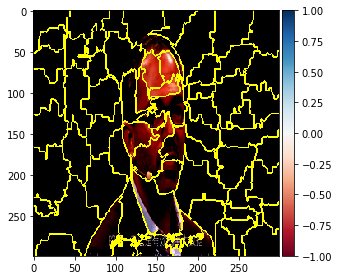

In [31]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels)) #轉成圖片 => 變為0-255 or 0-1

In [35]:
#In this example, 150 perturbations were used. However, for real life applications, 
#a larger number of perturbations will produce more reliable explanations. 
#Random zeros and ones are generated and shaped as a matrix with "perturbations as rows and superpixels as columns." 
#An example of a perturbation (the first one) is show below. Here, 1 represent that a superpixel is on and 0 represents it is off. 
#Notice that the length of the shown vector corresponds to the number of superpixels in the image.


#Generate perturbations
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0]])

In [36]:
perturbations.shape

(150, 64)

In [37]:
perturbations[0]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [38]:
perturbations[0].shape

(64,)

In [39]:
#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]               #找出perturbations[0]中=1者的index, 相同segment的pixel會有一樣的index
  mask = np.zeros(segments.shape)                              #superpixels.shape = 29*29; superpixels上, 同segment會被標記同樣的index
  for active in active_pixels:
      mask[segments == active] = 1                             #pixel位置的值 等於這個index者, 即為1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]       #=1 表 *1 = 不遮蔽, 否則*0 = 0
  return perturbed_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0]


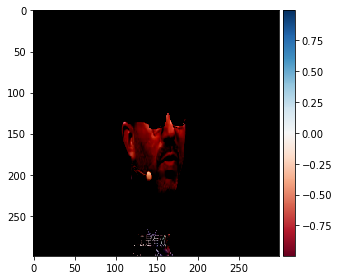

In [40]:
#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))